In [1]:
import numpy as np

In [2]:
# METODO DE GAUSS

def gauss(A, b):
    n = len(A)
    for i in range(n):
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k
        for k in range(i, n):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp
        tmp = b[maxRow]
        b[maxRow] = b[i]
        b[i] = tmp
        for k in range(i+1, n):
            c = -A[k][i] / A[i][i]
            for j in range(i, n):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]
            b[k] += c * b[i]
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = b[i] / A[i][i]
        for k in range(i-1, -1, -1):
            b[k] -= A[k][i] * x[i]
    return x

matrix = [[2, 1, -1], [-3, -1, 2], [-2, 1, 2]]

vector = [8, -11, -3]

print(gauss(matrix, vector))

[2.0, 3.0000000000000004, -0.9999999999999999]


In [3]:
# METODO DE GAUSS-JORDAN

def gauss_jordan(A, b):
    n = len(A)
    for i in range(n):
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k
        for k in range(i, n):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp
        tmp = b[maxRow]
        b[maxRow] = b[i]
        b[i] = tmp
        for k in range(n):
            if k != i:
                c = A[k][i] / A[i][i]
                for j in range(n):
                    A[k][j] -= c * A[i][j]
                b[k] -= c * b[i]
    for i in range(n):
        b[i] /= A[i][i]
    return b

matrix = [[2, 1, -1], [-3, -1, 2], [-2, 1, 2]]

vector = [8, -11, -3]

print(gauss_jordan(matrix, vector))

[2.0000000000000004, 3.0000000000000004, -0.9999999999999999]


In [4]:
# METODO LU 

def lu(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]
    for j in range(n):
        L[j][j] = 1.0
        for i in range(j+1):
            s1 = sum(U[k][j] * L[i][k] for k in range(i))
            U[i][j] = A[i][j] - s1
        for i in range(j, n):
            s2 = sum(U[k][j] * L[i][k] for k in range(j))
            L[i][j] = (A[i][j] - s2) / U[j][j]
    return L, U

def lu_solve(L, U, b):
    n = len(L)
    y = [0 for i in range(n)]
    x = [0 for i in range(n)]
    for i in range(n):
        y[i] = b[i] / L[i][i]
        for k in range(i+1, n):
            b[k] -= y[i] * L[k][i]
    for i in range(n-1, -1, -1):
        x[i] = b[i] / U[i][i]
        for k in range(i-1, -1, -1):
            b[k] -= x[i] * U[k][i]
    return x

matrix = [[2, 1, 0], [-1, 2, -1], [0, -1, 2]]

vector = [8, -11, -3]

L, U = lu(matrix)

print(L, U)


[[1.0, 0.0, 0.0], [-0.5, 1.0, 0.0], [0.0, -0.4, 1.0]] [[2, 1, 0], [0.0, 2.5, -1.0], [0.0, 0.0, 1.6]]


In [5]:
# METODO DE DOLITTLE

def dolittle(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]
    for i in range(n):
        L[i][i] = 1.0
    for i in range(n):
        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
        for j in range(i+1, n):
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]
    return L, U

def dolittle_solve(L, U, b):
    n = len(L)
    y = [0 for i in range(n)]
    x = [0 for i in range(n)]
    for i in range(n):
        y[i] = b[i] / L[i][i]
        for k in range(i+1, n):
            b[k] -= y[i] * L[k][i]
    for i in range(n-1, -1, -1):
        x[i] = b[i] / U[i][i]
        for k in range(i-1, -1, -1):
            b[k] -= x[i] * U[k][i]
    return x

matrix = [[2, 1, -1], [-3, -1, 2], [-2, 1, 2]]

vector = [8, -11, -3]

L, U = dolittle(matrix)

print(dolittle_solve(L, U, vector))

[2.0, 3.0, -1.0]


In [6]:
# METODO DE PARLET-REID

def parlet_reid(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]
    for i in range(n):
        L[i][i] = 1.0
    for i in range(n):
        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
        for j in range(i+1, n):
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]
    return L, U

def parlet_reid_solve(L, U, b):
    n = len(L)
    y = [0 for i in range(n)]
    x = [0 for i in range(n)]
    for i in range(n):
        y[i] = b[i] / L[i][i]
        for k in range(i+1, n):
            b[k] -= y[i] * L[k][i]
    for i in range(n-1, -1, -1):
        x[i] = b[i] / U[i][i]
        for k in range(i-1, -1, -1):
            b[k] -= x[i] * U[k][i]
    return x

matrix = [[2, 1, -1], [-3, -1, 2], [-2, 1, 2]]

vector = [8, -11, -3]

L, U = parlet_reid(matrix)

print(L, U)
print("Solucion: ")
print(parlet_reid_solve(L, U, vector))


[[1.0, 0.0, 0.0], [-1.5, 1.0, 0.0], [-1.0, 4.0, 1.0]] [[2, 1, -1], [0.0, 0.5, 0.5], [0.0, 0.0, -1.0]]
Solucion: 
[2.0, 3.0, -1.0]


In [7]:
# METODO DE CHOLESKY


import math
max = 100

def cholesky(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = math.sqrt(A[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L

def cholesky_solve(L, b):
    n = len(L)
    y = [0 for i in range(n)]
    for i in range(n):
        y[i] = (b[i] - sum(L[i][j] * y[j] for j in range(i))) / L[i][i]
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - sum(L[j][i] * x[j] for j in range(i+1, n))) / L[i][i]
    return x

matrix = [[4, -1, -1], [-1, 4, 1],[-1, 1, 4]]

vector = [1, 2, 3]

L = cholesky(matrix)

print(L)

[[2.0, 0.0, 0.0], [-0.5, 1.9364916731037085, 0.0], [-0.5, 0.38729833462074165, 1.8973665961010275]]


In [8]:
# INVERSA DE UNA MATRIZ

def inverse(A):
    n = len(A)
    A_inv = [[0.0] * n for i in range(n)]
    for i in range(n):
        A_inv[i][i] = 1.0
    for i in range(n):
        factor = 1.0 / A[i][i]
        for j in range(n):
            A[i][j] *= factor
            A_inv[i][j] *= factor
        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(n):
                    A[k][j] -= factor * A[i][j]
                    A_inv[k][j] -= factor * A_inv[i][j]
    return A_inv

matrix = [[4, - 1, 0, -1, 0, 0], [-1, 4, -1, 0, -1, 0], [0, -1, 4, 0, 0, -1], [-1, 0, 0, 4, -1, 0], [0, -1, 0, -1, 4, 0], [0, 0, -1, 0, -1, 4]]

print(inverse(matrix))

[[0.29393939393939394, 0.09090909090909091, 0.024242424242424242, 0.08484848484848484, 0.045454545454545456, 0.006060606060606061], [0.09128787878787878, 0.3181818181818182, 0.08484848484848484, 0.04696969696969697, 0.09659090909090909, 0.021212121212121213], [0.02727272727272727, 0.09090909090909091, 0.2909090909090909, 0.01818181818181818, 0.045454545454545456, 0.07272727272727272], [0.08446969696969697, 0.045454545454545456, 0.012121212121212121, 0.2924242424242424, 0.08522727272727273, 0.0030303030303030303], [0.043939393939393945, 0.09090909090909091, 0.024242424242424242, 0.08484848484848485, 0.29545454545454547, 0.006060606060606061], [0.017803030303030303, 0.045454545454545456, 0.0787878787878788, 0.025757575757575764, 0.08522727272727273, 0.2696969696969697]]


In [9]:

# Definir la matriz A
A = np.array([[4, 1], [2, 3]])

# Calcular la norma 1, norma infinita y norma 2
norm_1 = np.linalg.norm(A, 1)
norm_inf = np.linalg.norm(A, np.inf)
norm_2 = np.linalg.norm(A, 2)

# Calcular la inversa de A
A_inv = np.linalg.inv(A)

# Calcular la norma de la inversa
norm_1_inv = np.linalg.norm(A_inv, 1)
norm_inf_inv = np.linalg.norm(A_inv, np.inf)
norm_2_inv = np.linalg.norm(A_inv, 2)

# Calcular el número de condición
cond_1 = norm_1 * norm_1_inv
cond_inf = norm_inf * norm_inf_inv
cond_2 = norm_2 * norm_2_inv

print(f'Número de condición (norma 1): {cond_1}')
print(f'Número de condición (norma infinito): {cond_inf}')
print(f'Número de condición (norma 2): {cond_2}')

Número de condición (norma 1): 3.0
Número de condición (norma infinito): 3.0000000000000004
Número de condición (norma 2): 2.6180339887498945


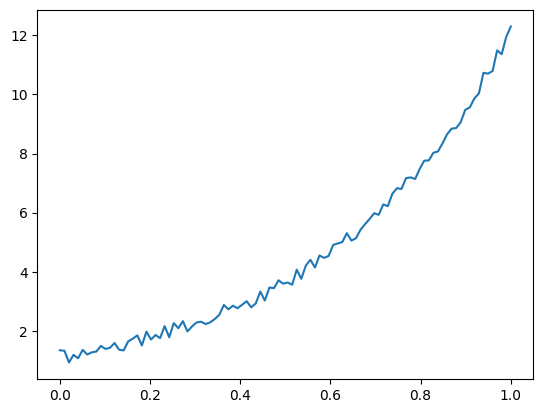

In [10]:
import scipy.io as sio
data = sio.loadmat("hw4data")

x_values = data["t"]
y_values = data["y"]

# Graficar una curva con x_values a y_values

import matplotlib.pyplot as plt

plt.plot(x_values, y_values)
plt.show()